In [1]:
#Name: Sanket Manik Salunke ID: 1001764897
import os  
import math 
import random 
from sklearn.metrics import confusion_matrix  
import copy 
import re 

In [2]:
data_path = "20_newsgroups"
#get current working directory
data_path = os.getcwd()
#getting exact path
data_path = data_path + "/20_newsgroups/"

In [3]:
#grabbing all the folder names from the directory
Folder_name = os.listdir(data_path)
len(Folder_name)


20

In [4]:
data_train = 500

In [5]:
filename ={}

In [6]:
#List of stopwords to remove from the text to clearn the data
list_stopwords = ['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at',
 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 
 'can', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during',
 'each', 'few', 'for', 'from', 'further', 
 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's",
 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's",
 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself',
 "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself',
 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours' 'ourselves', 'out', 'over', 'own',
 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 
 'than', 'that',"that's", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', "there's", 'these', 'they', "they'd", 
 "they'll", "they're", "they've", 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 
 'was', "wasn't", 'we', "we'd", "we'll", "we're", "we've", 'were', "weren't", 'what', "what's", 'when', "when's", 'where',
 "where's", 'which', 'while', 'who', "who's", 'whom', 'why', "why's",'will', 'with', "won't", 'would', "wouldn't", 
 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves', 
 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'hundred', 'thousand', '1st', '2nd', '3rd',
 '4th', '5th', '6th', '7th', '8th', '9th', '10th',"'",'!','/','\\','=',',',':', '<','>','?','.','"',')','(','|','-','#','*','+','$']


In [7]:
stop_words_1 = len(list_stopwords)
print("Total number of stop words",stop_words_1)

Total number of stop words 217


In [8]:
def remove_stopwords(data):
    #https://www.geeksforgeeks.org/python-string-replace/
    data = data.replace('\n', ' ')  
    data = data.replace('\t', ' ')  
    #https://www.programiz.com/python-programming/methods/string/lower
    data = data.lower()     
    for i in list_stopwords:
        data = data.replace(i,' ')  
    return data     

In [9]:
#https://stackoverflow.com/questions/12851791/removing-numbers-from-string
#preprocessing of the data by removing unwanted digits and repeated symbols in the data
def preprocess(data):
    #removing digits
    data = ''.join([i for i in data if not i.isdigit()])

    
    #https://stackoverflow.com/questions/12628958/remove-small-words-using-python
    shortword = re.compile(r'\W*\b\w{1,3}\b')
    #remove symbols which are repeating
    #https://stackoverflow.com/questions/1660694/regular-expression-to-match-any-character-being-repeated-more-than-10-times
    test = re.compile(r'(.)\1{9,}')
    data = shortword.sub('', data)
    data = test.sub('', data)
    #https://www.w3schools.com/python/ref_string_split.asp
    words = data.split(' ')    
    return words

In [10]:
#function to get the total words dictionary of bag of words
def totalcal(words,total_dic,dic):
    #continue for spcaces
    for word in words:
        if word == ' ':
            continue
        if word == '':
            continue
        #reference: https://www.programiz.com/python-programming/methods/dictionary/get
        #get the value of the word if present otherwise 0
        hold = dic.get(word, 0)
        hold_t = total_dic.get(word, 0)
        #if it is not present then set to 1
        if hold == 0:
            dic[word] = 1
        else:
            #if it is present then increment with 1 for count
            dic[word] = hold + 1
        if hold_t == 0:
            total_dic[word] = 1
        else:
            total_dic[word] = hold_t + 1
    return total_dic, dic
        

In [11]:
#bag of words calculation by giving training data value and filename
#https://towardsdatascience.com/word-bags-vs-word-sequences-for-text-classification-e0222c21d2ec
def bagofwords(data_train, filename):
    folder_list = os.listdir(data_path)  
    total_dic,bag_dict = {}, {}

    print(" bag of words calculation")
    print("\n Reading all the folders one by one")
    for each_folder in folder_list:
        dic = {}
        folder_ = data_path + each_folder
        print(each_folder)
        files = os.listdir(folder_)     
        count = 0
        #iterate over the files to get the total count
        for file in files:
            count = count + 1
            #break once finished with training dataset which is 50% of the total data
            if count > data_train:     
                break
            check = folder_ + '/'+file
            #open the file to read 
            #https://www.w3schools.com/python/python_file_open.asp
            currentFile = open(check,'r')
            #read the file and remove stopwords from the data
            data = remove_stopwords(currentFile.read())    
            
            #preprocessing data
            words = preprocess(data)
            #dictionary for total number of words as a bag of words from the text
            total_dic, dic = totalcal(words,total_dic,dic)
            #remove file from list once done
            files.remove(file)
        filename[each_folder] = files
        bag_dict[each_folder] = dic
    print("\nTotal number of bag of words ", len(total_dic), "words" )
    return folder_list, bag_dict


In [12]:
folder_list, bag_dict = bagofwords(data_train, filename)

 bag of words calculation

 Reading all the folders one by one
alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc

Total number of bag of words  42526 words


In [13]:
# folder_list

In [14]:
print("\n dictionary of the words in one class:\n",bag_dict['comp.graphics'])


 dictionary of the words in one class:
 {'xref': 171, 'comp': 1482, 'news': 761, 'phod': 191, 'newsgro': 556, 'subject': 544, 'present': 34, 'reply': 102, 'follow': 98, 'rderock': 6, 'nswc': 6, 'tuesd': 4, 'june': 6, 'surf': 75, 'center': 94, 'rese': 126, 'ness': 31, 'neer': 37, 'system': 238, 'purpose': 19, 'exch': 12, 'progr': 513, 'develop': 46, 'spects': 22, 'current': 74, 'progress': 18, 'proposed': 14, 'dered': 10, 'types': 24, 'presentregul': 1, 'nutes': 15, 'length': 11, 'deot': 4, 'need': 183, 'ccepted': 6, 'publ': 85, 'proceed': 21, 'ever': 78, 'ewgr': 1, 'reproduced': 2, 'dees': 4, 'bstr': 18, 'subm': 22, 'code': 159, 'nclude': 71, 'type': 63, 'ddresses': 14, 'teleph': 7, 'mult': 132, 'pers': 75, 'ccept': 17, 'sent': 18, 'reproduct': 4, 'must': 66, 'rece': 25, 'bove': 67, 'ddress': 85, 'dely': 12, 'possnternet': 1, 'model': 51, 'cdnswc': 1, 'comput': 59, 'tures': 55, 'cenetstructures': 1, 'ctsnet': 1, 'hnet': 1, 'legs': 4, 'usenet': 190, 'pqlhn': 2, 'references': 248, 'dept

In [15]:

#dictionary of all the words 
print("\n dictionary of all the words:\n",bag_dict)


 dictionary of all the words:
 {'alt.atheism': {'xref': 131, 'moder': 11, 'news': 840, 'pple': 336, 'ndrew': 139, 'gnus': 10, 'usenet': 123, 'cwru': 186, 'spool': 21, 'uunet': 167, 'bmpcug': 20, 'newsgro': 519, 'subject': 590, 'summ': 18, 'books': 70, 'ddresses': 10, 'nyth': 128, 'keyw': 15, 'follow': 142, 'sult': 20, 'pproved': 4, 'request': 17, 'ersedes': 3, 'decem': 3, 'versddresses': 2, 'free': 116, 'found': 65, 'bumper': 2, 'ckers': 27, 'ffrf': 2, 'teleph': 11, 'evolut': 108, 'sell': 20, 'symbol': 3, 'feet': 6, 'deluxe': 2, 'moulded': 2, 'postp': 2, 'urel': 2, 'hollywood': 4, 'people': 448, 'lynn': 4, 'gold@netcom': 2, 'rectly': 33, 'press': 23, 'publ': 57, 'ques': 3, 'book': 127, 'ndbook': 2, 'foote': 4, 'bsurd': 24, 'troc': 6, 'tself': 64, 'vers': 297, 'nclud': 29, 'ught': 20, 'holy': 36, 'street': 11, 'buff': 10, 'ltern': 51, 'ddress': 15, 'older': 4, 'glenn': 2, 'promot': 3, 'secul': 20, 'freeth': 6, 'rterly': 2, 'newsletter': 4, 'llenbuff': 2, 'streethollow': 2, 'nker': 3, '

In [17]:
folder_l = copy.copy(folder_list)

In [18]:
# folder_l

In [19]:
def getdata():
    
    global loc
    #iterate to get the data from the file from the particular dataset
    #https://docs.python.org/3/library/random.html
    while (len(folder_l)):
        temp = random.randint(0,len(folder_l)-1)
        curr_folder = folder_l[temp]
        #check if file exits randomly return null if it doesnt
        if len(filename[curr_folder])== 0:
            folder_l.remove(curr_folder)
        else:
            #read data from the file inside the folder 
#             https://docs.python.org/3/library/random.html
            tempi = random.randint(0, len(filename[curr_folder])-1)
            file = filename[curr_folder][tempi]
            filename[curr_folder].remove(file)
            loc = curr_folder
            #open and read the file and then return the data
            data = open(data_path + curr_folder + '/'+ file,'r')
            return data.read()
    loc = 'null'
    return 'null'

In [20]:
def probability_calculation(words, dic):
    #list of dictionary values
    Total_dic_values = dic.values()
    #sum of all the values in the dictionary
    Sum_dic_values = sum(Total_dic_values)
    #Initialising probability for prob calculation
    probability = 0.0
    #iterate total words to calculate probability by one by one dictionary words to get the total probability
    for word in words:
        p_cal = dic.get(word, 0.0) + 0.0001
        probability = probability + math.log(float(p_cal)/float(Sum_dic_values))
    return probability

In [21]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
#function to calculate the accuracy using probability calculation of total number of hits
from sklearn.metrics import classification_report
def Accuracy_cal(hit,count,y_true,y_pred):
    print('\nAccuracy = %.1f'% (float(hit)/float(count - 1)*100))
    print("\nConfusion Martix : \n")
    print(confusion_matrix(y_true, y_pred))
    print("\n .......Classification Report.....")
    print(classification_report(y_true, y_pred))

#     global t1  
    t1 = float(hit)/float(count - 1)*100
    return t1

In [22]:
def bayes(folder_l):
    print("\nCalculating Accuracy using Naive Bayes")
 
    y_pred = []
    y_true = []
    #initializing the values along with the list declaration
    hit, count, data = 0, 0, 1
    #calculate the probability using bayes theorem
    while (data):
        data = getdata()
        count = count + 1
        if data =='null':
            break
        data = remove_stopwords(data)
        
        #preprocessing data
        words = preprocess(data)
        #https://www.programiz.com/python-programming/methods/list/remove
        #remove all the unnecessary spaces from the data
        if words == ' ':
            words = words.remove(' ')
        if words == '':
            words = words.remove('')
        

        prob_list = []
        #calculate the probability by finding out maximum value
        for each_folder in folder_list:
            prob = probability_calculation(words,bag_dict[each_folder])
            prob_list.append(prob)
            maxval_index = prob_list.index(max(prob_list))
            y_pred.append(folder_list[maxval_index])
            y_true.append(loc)
        if loc == folder_list[maxval_index]:
            hit = hit + 1
    global t1
    t1 = Accuracy_cal(hit,count,y_true,y_pred)


In [23]:
bayes(folder_l)


Calculating Accuracy using Naive Bayes

Accuracy = 78.5

Confusion Martix : 

[[9429   10    6   32   47    6  131   53   95   49    3    9    0   20
     0   16    7    6    4   77]
 [ 593 5510  404 1037  785  350  690  228   81   36   37   34  144   21
    36    0    8    4    2    0]
 [ 587  952 5062 1466  866  173  588  131   56   38    0    1   48    8
    24    0    0    0    0    0]
 [ 570  815  408 6100 1143   85  515  120   44   44   30    9  110    0
     0    0    0    3    4    0]
 [ 628  868  373 1012 6131   16  676  111   36   26   10    9   88    7
     6    0    0    0    2    1]
 [ 538 1475  291  939  754 5327  311   91   76   33    0   29  104   10
     6    0   15    0    0    1]
 [ 727  948  334  944  765    6 5675  235   76   77   52    3  105   21
    14    0   16    0    2    0]
 [1141  655  314  708  709   61  561 5297  310   75   21    0   96   15
    24    0   12    0    0    1]
 [1232  729  111  696  644   25  456  466 5585    0   20    0   16   14
     6   

<h1> Implementation with different stop words </h1>

In [24]:
from nltk.corpus import stopwords #generate stopwords for comparison
stop_words = list(stopwords.words('english'))
    

In [25]:
stop_words_2 = len(stop_words)
print("Total number of stop words",stop_words_2)

Total number of stop words 179


In [26]:
def remove_stopwords1(data1):
    #remove unnecessary data from the data
    #remove extra spaces at end of the line
    data1 = data1.replace('\n', ' ')  
    data1 = data1.replace('\t', ' ')      
    data1 = data1.lower() 
    #remove stop words from the data
    for i in stop_words:
        data1 = data1.replace(i,' ')  
    return data1 

In [27]:
def bagofwords1(data_train, filename):
    folder_list1 = os.listdir(data_path)  
    total_dic1,bag_dict1 = {}, {}
#     bag_dict1 = {}
    print("bag of words calculation")
    print("\n Reading all the folders one by one")

    for fo in folder_list1:
        dic1 = {}
        folder_ = data_path + fo
        print(fo)
        files = os.listdir(folder_)     
        count = 0
        for fi in files:
            count = count + 1
            #break once reach end of the training data
            if count > data_train:     
                break
            check = folder_ + '/'+fi
            currentFile = open(check,'r')   
            #remove stopwords from the currentdata from the current file
            data1 = remove_stopwords1(currentFile.read())    
            
            #preprocessing data
            words1 = preprocess(data1)
            
            total_dic1, dic1 = totalcal(words1,total_dic1,dic1)
            
                
            files.remove(fi)
        filename[fo] = files
        bag_dict1[fo] = dic1
    print("\nTotal number of bag of words", len(total_dic1), "words" )
    return folder_list1, bag_dict1


In [28]:
folder_list1, bag_dict1 = bagofwords1(data_train, filename)

bag of words calculation

 Reading all the folders one by one
alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc

Total number of bag of words 16567 words


In [29]:
#https://docs.python.org/3/library/copy.html
#copy the value
folder_l1 = copy.copy(folder_list1)

In [30]:
def getdata1():
    
    global loc
    #iterate to get the data from the file from the particular dataset
    #https://docs.python.org/3/library/random.html
    while (len(folder_l1)):
        r_fo = random.randint(0,len(folder_l1)-1)
        curr_folder = folder_l1[r_fo]
        if len(filename[curr_folder])== 0:
            folder_l1.remove(curr_folder)
        else:
            #read data from the file inside the folder
            r_fi = random.randint(0, len(filename[curr_folder])-1)
            fil = filename[curr_folder][r_fi]
            filename[curr_folder].remove(fil)
            loc = curr_folder
            data = open(data_path + curr_folder + '/'+ fil,'r')
            return data.read()
    loc = 'null'
    return 'null'

In [31]:
def bayes1(folder_l1):
    print("\nCalculating Accuracy")

    y_pred1 = []
    y_true1 = []
    #intialisation and declaration
    hit1, count1, data1 = 0, 0, 1
    #get the data after preprocessing and removing extra spaces then calculate the probability using bayes theorem to 
    # calculate the maximum probability to get the exact value which can be further use for accuracy calculation
    while (data1):
        data1 = getdata1()
        count1 = count1 + 1
        if data1 =='null':
            break
        data1 = remove_stopwords1(data1)
        
        #preprocessing data
        words1 = preprocess(data1)
            
        if words1 == ' ':
            words1 = words1.remove(' ')
        if words1 == '':
            words1 = words1.remove('')
        
        #list to add all the probabilities
        prob_list1 = []
        for each_folder1 in folder_list1:
            prob1 = probability_calculation(words1,bag_dict1[each_folder1])
            prob_list1.append(prob1)
            #taking maximum value of probability
            maxval_index1 = prob_list1.index(max(prob_list1))
            y_pred1.append(folder_list1[maxval_index1])
            y_true1.append(loc)
        if loc == folder_list1[maxval_index1]:
            hit1 = hit1 + 1
    global t2
    #accuracy and confusion matrix calculation
    t2 = Accuracy_cal(hit1,count1,y_true1,y_pred1)


In [32]:
bayes1(folder_l1)


Calculating Accuracy

Accuracy = 51.3

Confusion Martix : 

[[5974  172  211 1619  432   21  601  257  139  246   35    0   54   10
    13   79   39    5   13   80]
 [ 730 3181  416 2437  557  279 1208  500  276  126   56    6   66   28
    62   15   35   14    4    4]
 [ 714  762 2898 2525  581  117 1327  441  221  156   70    0  120   14
    24    5   12    6    4    3]
 [ 685  783  476 5206  586  104 1158  395  171   98   64   18  170   28
    37   10    8    0    2    1]
 [ 775  684  439 2164 3936  100 1032  424  204   88   40    0   72   22
     9    0    4    1    5    1]
 [ 745 1323  441 2101  496 3227  685  349  193  154   50   45  132    7
    28    0   14    3    6    1]
 [ 662 1016  401 2035  552  121 4384  334  137   91   72    3  120   14
    16    5   24    6    5    2]
 [ 859  806  445 1748  567   12 1155 3788  272  138   23   13  120   15
    18    5    8    0    6    2]
 [ 842  865  455 1590  677   43  858  555 3895  126   20   18   28    7
     6    0   12    0    2 

In [33]:
print("Accuracy from stopword1:",t1)

Accuracy from stopword1: 78.53570714142829


In [34]:
print("Accuracy from stopword2:",t2)

Accuracy from stopword2: 51.3002600520104


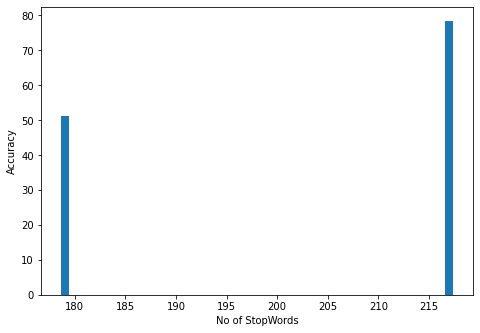

In [35]:
#Reference: https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
#plot the values on x axis
stop_words_ = [stop_words_1, stop_words_2]
#plot the values on y-axis
Accuracy = [t1,t2]
ax.bar(stop_words_,Accuracy)
ax.set_ylabel('Accuracy')
ax.set_xlabel('No of StopWords')
plt.show()